In [1]:
import psycopg2

connection = psycopg2.connect(database="router", user="admin", password="pwd", host="localhost", port=5432)

cursor = connection.cursor()

cursor.execute("SELECT * from public.router_cross_chain_transactions;")

In [2]:
import pandas as pd

record = cursor.fetchall()

columns = [desc[0] for desc in cursor.description]

router_df = pd.DataFrame(record, columns=columns)

csv_path = "datasets\wormhole_one_month_cross_chain.csv"

wormhole_df = pd.read_csv(csv_path)

print("Router columns:", router_df.columns)
print("Wormhole columns:", wormhole_df.columns)
#print(router_df.head())

Router columns: Index(['id', 'src_blockchain', 'src_transaction_hash', 'src_from_address',
       'src_to_address', 'src_fee', 'src_fee_usd', 'src_timestamp',
       'dst_blockchain', 'dst_transaction_hash', 'dst_from_address',
       'dst_to_address', 'dst_fee', 'dst_fee_usd', 'dst_timestamp',
       'deposit_id', 'depositor', 'recipient', 'src_contract_address',
       'dst_contract_address', 'input_amount', 'input_amount_usd',
       'output_amount', 'output_amount_usd', 'message_hash'],
      dtype='object')
Wormhole columns: Index(['id', 'emitter_chain_id', 'emitter_address_32', 'sequence',
       'src_blockchain', 'src_transaction_hash', 'src_from_address',
       'src_to_address', 'src_fee', 'src_fee_usd', 'src_timestamp', 'src_date',
       'dst_blockchain', 'dst_transaction_hash', 'dst_from_address',
       'dst_to_address', 'dst_fee', 'dst_fee_usd', 'dst_timestamp', 'dst_date',
       'src_contract_address', 'dst_contract_address', 'input_amount',
       'input_amount_usd', '

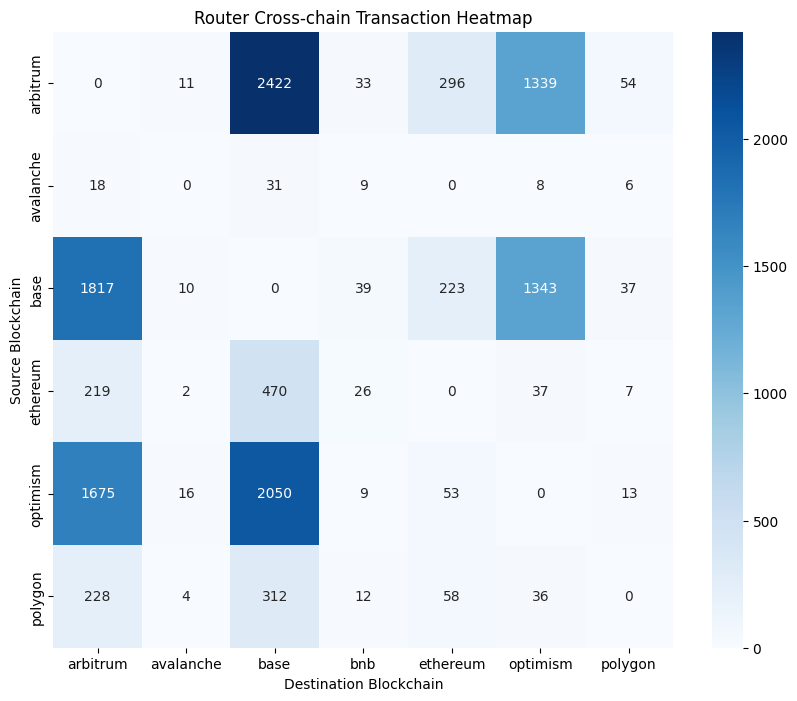

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = router_df.groupby(['src_blockchain', 'dst_blockchain']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Router Cross-chain Transaction Heatmap")
plt.ylabel("Source Blockchain")
plt.xlabel("Destination Blockchain")
plt.show()

0        1733107630
1        1733014379
2        1733039089
3        1733781603
4        1733810687
            ...    
12918    1735155847
12919    1735428319
12920    1735382395
12921    1735166800
12922    1735496657
Name: src_timestamp, Length: 12923, dtype: int64
(12923, 25)
     id src_blockchain                               src_transaction_hash  \
0     1       arbitrum  0xb17a200b1a844f565ccb331cac838fa6990c3909dd9b...   
1     2       arbitrum  0xcdb738ef47dea3b69403f26564c7800dc7f0f19a839e...   
2     3           base  0xa2ae33cec1cd9163c97b9d4250e7f1666ce6635933dd...   
3  2646       arbitrum  0x9b9af8f22908c1c083865aadffbaa6292a4684c8fd98...   
4  5701           base  0x49b73fa070d3d0667f9859696733fc0930744c8d89c9...   

                             src_from_address  \
0  0xebb28d2c512ed1786b246c7a96328ab308ce0f42   
1  0xcdfa73905898821ced151fa3667c8cfe349dba21   
2  0x0e5b8ffef26d4bfd4f54effdf2108711f7439f10   
3  0x42d50d0894b43c78f8e34d38ea5749808f66bfc3   
4  0xc8e80d

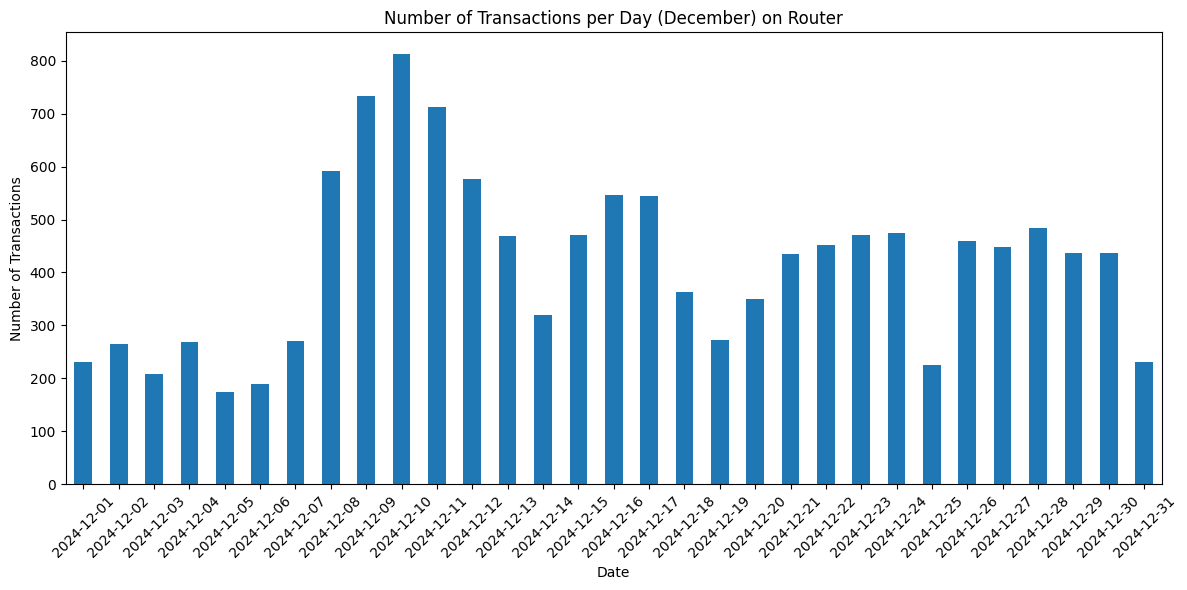

In [ ]:
print(router_df['src_timestamp'])
router_df['src_timestamp'] = pd.to_datetime(router_df['src_timestamp'], unit='s')

december_df = router_df[router_df['src_timestamp'].dt.month == 12]

daily_counts = december_df.groupby(december_df['src_timestamp'].dt.date).size()
print(december_df.shape)
print(december_df.head())

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='bar')
plt.title('Number of Transactions per Day (December) on Router')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

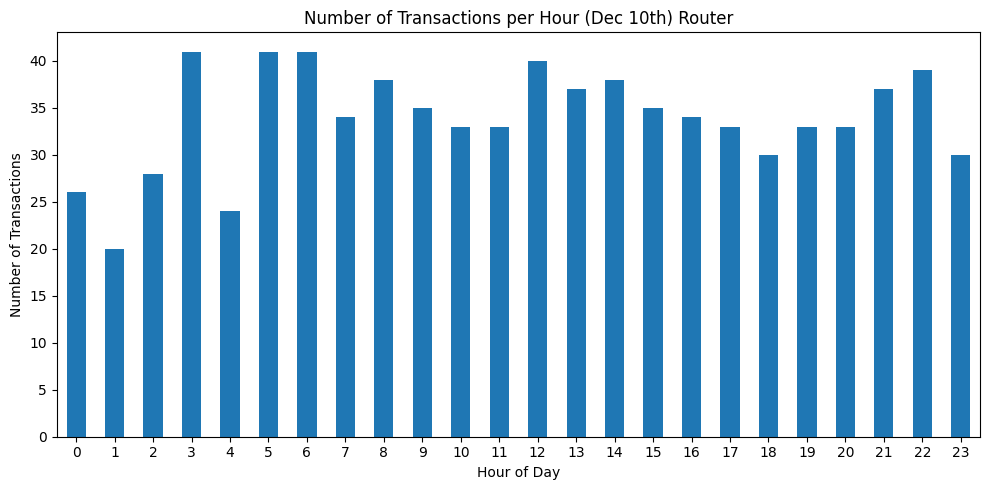

In [ ]:
dec10_df = router_df[router_df['src_timestamp'].dt.date == pd.to_datetime('2024-12-10').date()]

hourly_counts = dec10_df.groupby(dec10_df['src_timestamp'].dt.hour).size()

plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar')
plt.title('Number of Transactions per Hour (Dec 10th) Router')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
address_counts = router_df['src_from_address'].value_counts()

print(address_counts.head(10))

src_from_address
0xfb6de01779237b5150386fb0cffe0172038a2357    1231
0x23d2afce5543d6f6959d3ef33ea178ca08e77797      29
0x3c6faa30489f7ed7774cc52376a08315da01cb58      29
0x14ae5bfb8e69c1a28f782f6c6db99694ce0a134b      26
0x24d337865e9bff6c8b65397b3c1f61fb78b1f1e3      25
0xa40da4d0272b2dc571baf9122165dd29989ae81c      24
0x3dbc7ba959e38bd19ff951b6a12c9653d41637e0      23
0xc667321768275d67c9ae273da8732e65e9c6d09b      22
0x10de538b1ef0e7efb2c138b91917c2ad5f44fec5      20
0xc9bcec43b9453aed2bac9c496b30b740b6a04073      16
Name: count, dtype: int64


C:\Users\cohen\AppData\Local\Temp\ipykernel_32336\2863748821.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_df['src_timestamp'] = pd.to_datetime(address_df['src_timestamp'], unit='s')


(1231, 25)
       id src_blockchain                               src_transaction_hash  \
1381  544       optimism  0xd4e2f37e950d9f6786e9f85a40ea10cbb85824f014a3...   
1385  549       ethereum  0xf25f53a9c00590d034fe6da8d4686aaa0bc917529cc8...   
1391  555           base  0xb26c4051be9bd728cf7e8a3db821bd603b22aae7a934...   
1414  580           base  0xac3bd7213c005059ef7cb9d4dafdd96fa0c70a804cf9...   
1480  650           base  0xd4797ee45b0c8f977b82b4294e0c7099842824fc4f87...   

                                src_from_address  \
1381  0xfb6de01779237b5150386fb0cffe0172038a2357   
1385  0xfb6de01779237b5150386fb0cffe0172038a2357   
1391  0xfb6de01779237b5150386fb0cffe0172038a2357   
1414  0xfb6de01779237b5150386fb0cffe0172038a2357   
1480  0xfb6de01779237b5150386fb0cffe0172038a2357   

                                  src_to_address           src_fee  \
1381  0x8201c02d4ab2214471e8c3ad6475c8b0cd9f2d06       26931618756   
1385  0xc21e4ebd1d92036cb467b53fe3258f219d909eb9  11354496320

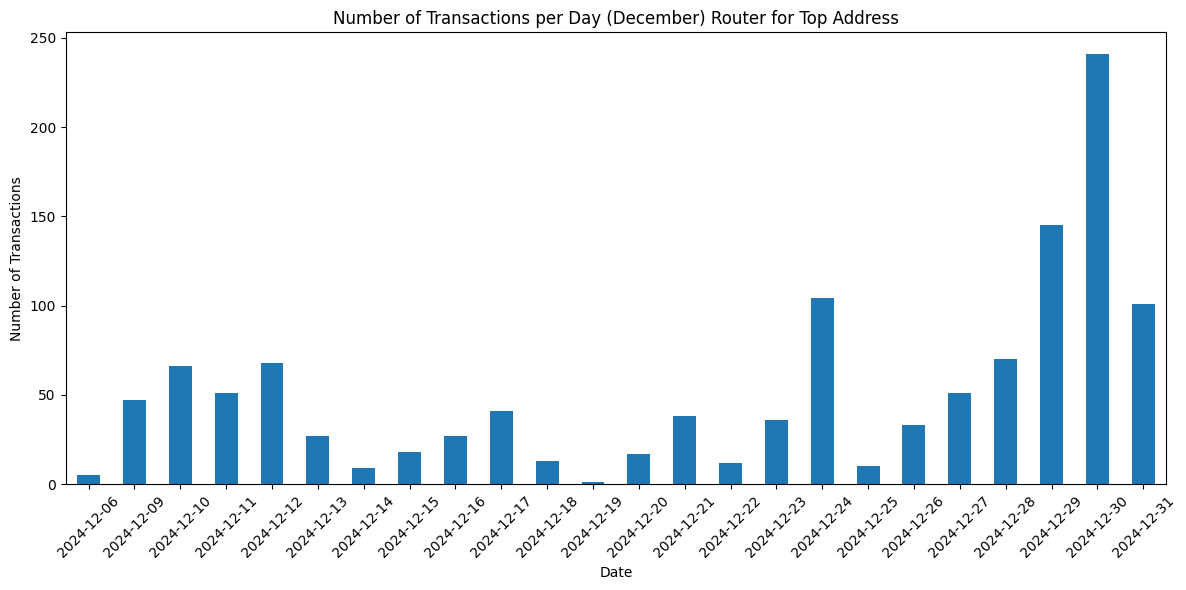

In [ ]:
address = '0xfb6de01779237b5150386fb0cffe0172038a2357'
address_df = router_df[router_df['src_from_address'] == address]

address_df['src_timestamp'] = pd.to_datetime(address_df['src_timestamp'], unit='s')

december_df = address_df[address_df['src_timestamp'].dt.month == 12]

daily_counts = december_df.groupby(december_df['src_timestamp'].dt.date).size()
print(december_df.shape)
print(december_df.head())

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='bar')
plt.title('Number of Transactions per Day (December) Router for Top Address')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
address = '0xfb6de01779237b5150386fb0cffe0172038a2357'
address_df = router_df[router_df['src_from_address'] == address]
address_df['src_timestamp'] = pd.to_datetime(address_df['src_timestamp'], unit='s')

target_date = pd.to_datetime('2024-12-30').date()
dec30_df = address_df[address_df['src_timestamp'].dt.date == target_date]

dst_counts = dec30_df['dst_blockchain'].value_counts()

print(dst_counts)

dst_blockchain
arbitrum    107
base         91
optimism     43
Name: count, dtype: int64


C:\Users\cohen\AppData\Local\Temp\ipykernel_32336\711951347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  address_df['src_timestamp'] = pd.to_datetime(address_df['src_timestamp'], unit='s')


src_timestamp
2024-12-01    148812.0
2024-12-02    110312.0
2024-12-03     98407.0
2024-12-04    105387.0
2024-12-05    211814.0
2024-12-06     83284.0
2024-12-07    233940.0
2024-12-08    363312.0
2024-12-09    743972.0
2024-12-10    865976.0
2024-12-11    775792.0
2024-12-12    617374.0
2024-12-13    359673.0
2024-12-14    241711.0
2024-12-15    386957.0
2024-12-16    491375.0
2024-12-17    601662.0
2024-12-18    311369.0
2024-12-19    117835.0
2024-12-20    223681.0
2024-12-21    442162.0
2024-12-22    402732.0
2024-12-23    413219.0
2024-12-24    475007.0
2024-12-25    119542.0
2024-12-26    282246.0
2024-12-27    406828.0
2024-12-28    413103.0
2024-12-29    518189.0
2024-12-30    774481.0
2024-12-31    313361.0
Name: input_amount_usd, dtype: float64


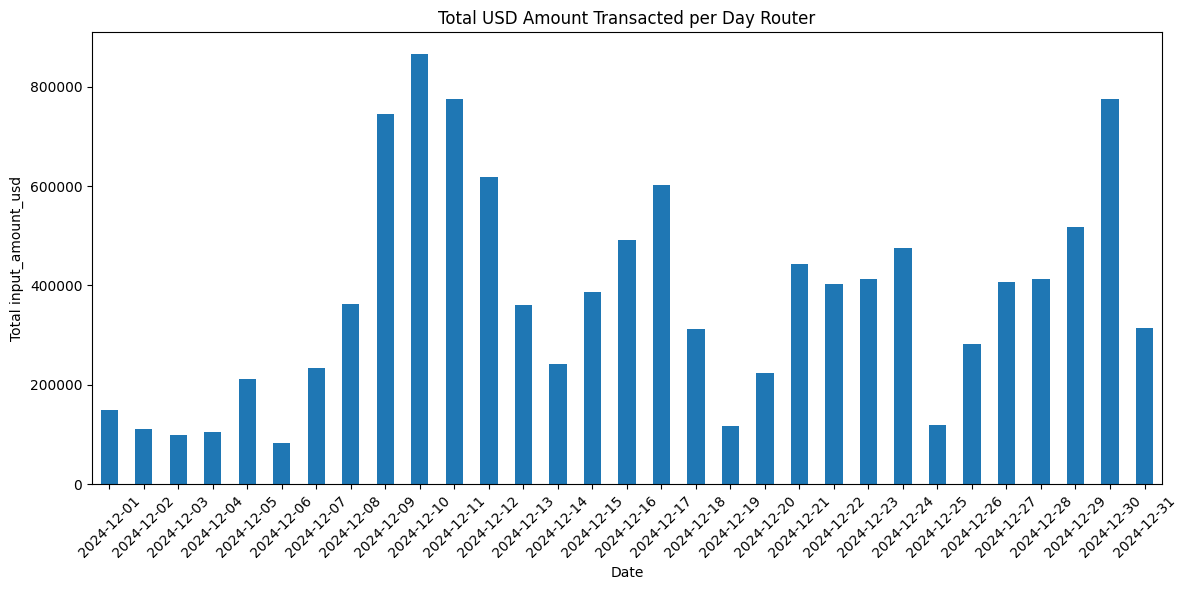

In [ ]:
router_df['src_timestamp'] = pd.to_datetime(router_df['src_timestamp'], unit='s')

router_df['input_amount_usd'] = pd.to_numeric(router_df['input_amount_usd'], errors='coerce')
daily_usd = router_df.groupby(router_df['src_timestamp'].dt.date)['input_amount_usd'].sum()

print(daily_usd)

plt.figure(figsize=(12, 6))
daily_usd.plot(kind='bar')
plt.title('Total USD Amount Transacted per Day Router')
plt.xlabel('Date')
plt.ylabel('Total input_amount_usd')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

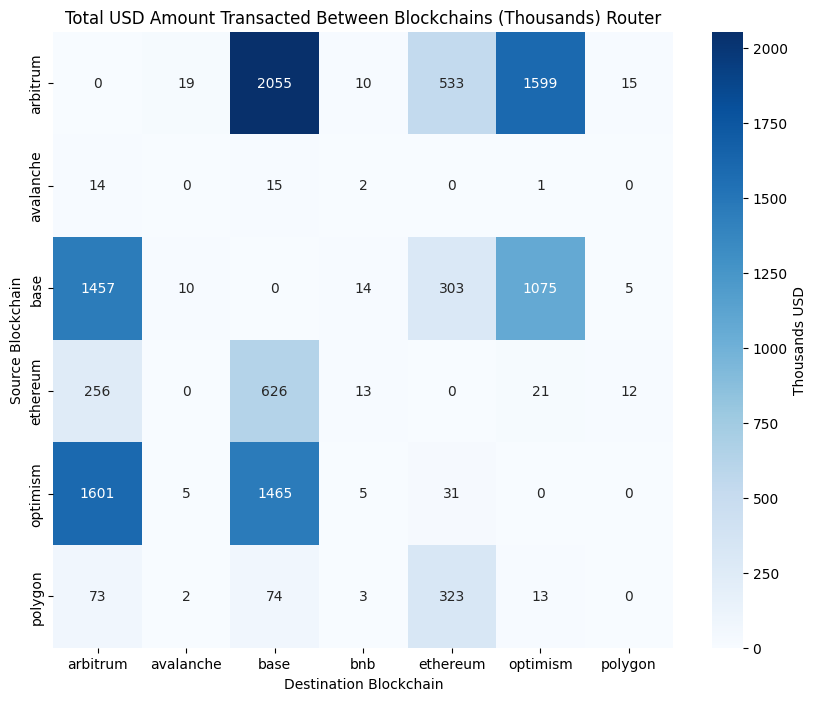

In [15]:
router_df['input_amount_usd'] = pd.to_numeric(router_df['input_amount_usd'], errors='coerce')

usd_heatmap = router_df.groupby(['src_blockchain', 'dst_blockchain'])['input_amount_usd'].sum().unstack(fill_value=0) / 1000

plt.figure(figsize=(10, 8))
sns.heatmap(usd_heatmap, annot=True, fmt=".0f", cmap="Blues", cbar_kws={'label': 'Thousands USD'})
plt.title("Total USD Amount Transacted Between Blockchains (Thousands) Router")
plt.ylabel("Source Blockchain")
plt.xlabel("Destination Blockchain")
plt.show()

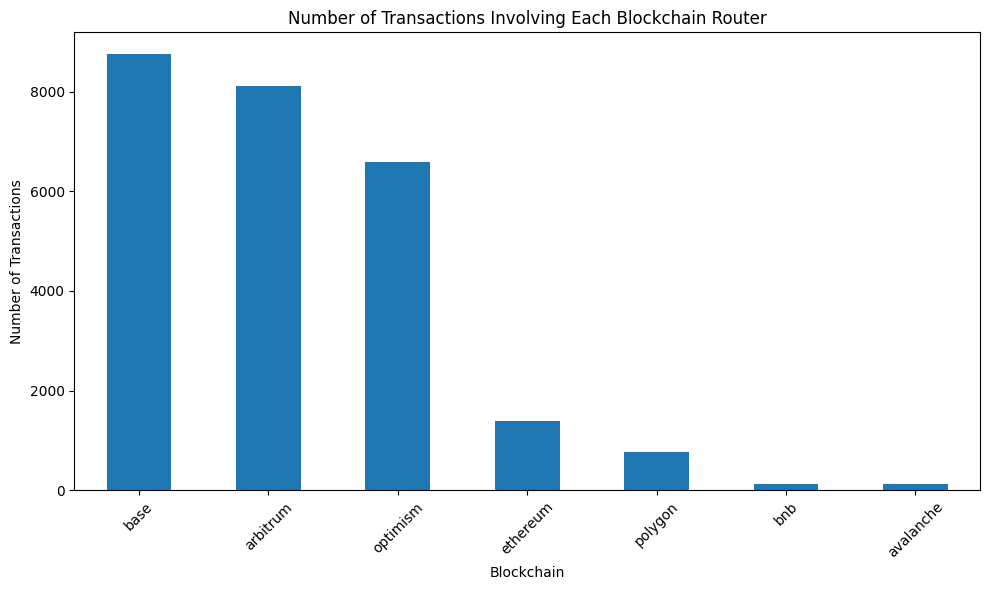

In [ ]:
src_counts = router_df['src_blockchain'].value_counts()
dst_counts = router_df['dst_blockchain'].value_counts()

total_counts = src_counts.add(dst_counts, fill_value=0).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_counts.plot(kind='bar')
plt.title('Number of Transactions Involving Each Blockchain Router')
plt.xlabel('Blockchain')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

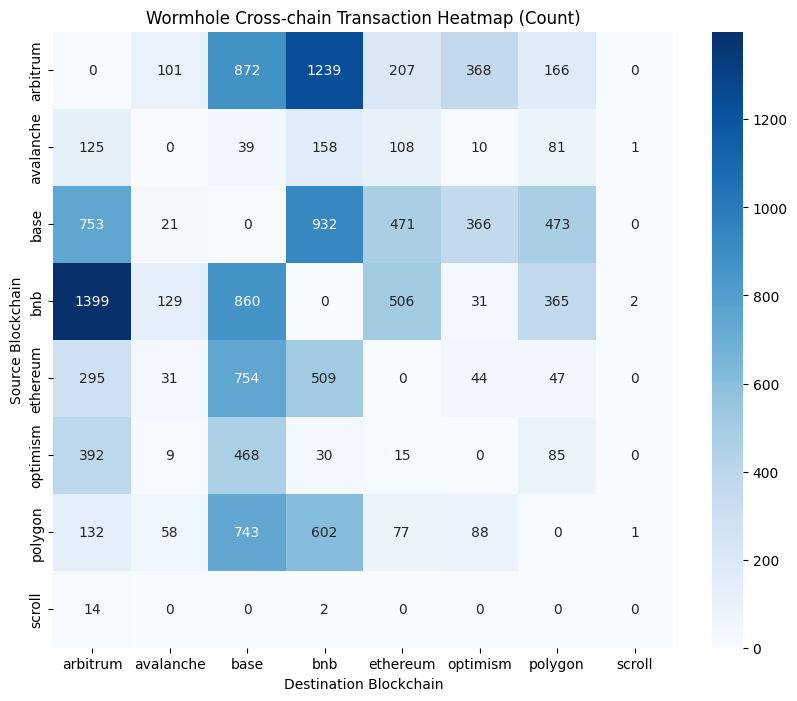

In [17]:

wormhole_heatmap_data = wormhole_df.groupby(['src_blockchain', 'dst_blockchain']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(wormhole_heatmap_data, annot=True, fmt="d", cmap="Blues")
plt.title("Wormhole Cross-chain Transaction Heatmap (Count)")
plt.ylabel("Source Blockchain")
plt.xlabel("Destination Blockchain")
plt.show()

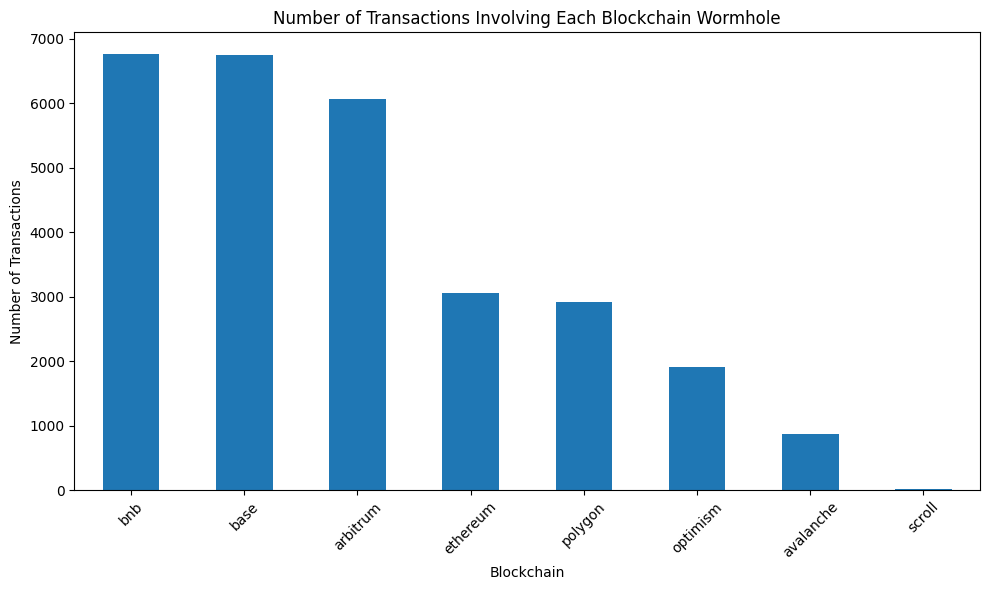

In [ ]:
src_counts = wormhole_df['src_blockchain'].value_counts()
dst_counts = wormhole_df['dst_blockchain'].value_counts()

total_counts = src_counts.add(dst_counts, fill_value=0).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_counts.plot(kind='bar')
plt.title('Number of Transactions Involving Each Blockchain Wormhole')
plt.xlabel('Blockchain')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()